<a href="https://colab.research.google.com/github/OzasaHiro/LitterSort/blob/main/model_maker_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -V

Python 3.10.12


In [2]:

!pip install --upgrade pip
!pip install mediapipe-model-maker

#!pip install -q tflite-model-maker

#!pip install -q tflite-support

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.5/117.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 14.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [3]:
from google.colab import auth, drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from mediapipe_model_maker import image_classifier

#import tflite_model_maker as mm

#from tflite_model_maker import model_spec
#from tflite_model_maker import image_classifier
#from tflite_model_maker.config import ExportFormat
#from tflite_model_maker.config import QuantizationConfig
#from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [6]:

train_path = f'/content/drive/MyDrive/dataset-compost-net-versionA/training'
test_path = f'/content/drive/MyDrive/dataset-compost-net-versionA/test'

In [7]:
print(train_path)
labels = []
for i in os.listdir(train_path):
  if os.path.isdir(os.path.join(train_path, i)):
    labels.append(i)
print(labels)

/content/drive/MyDrive/dataset-compost-net-versionA/training
['paper', 'metal', 'cardboard', 'trash', 'glass', 'plastic', 'compost']


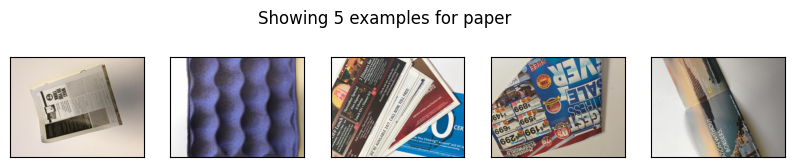

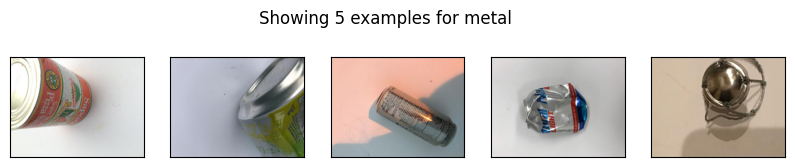

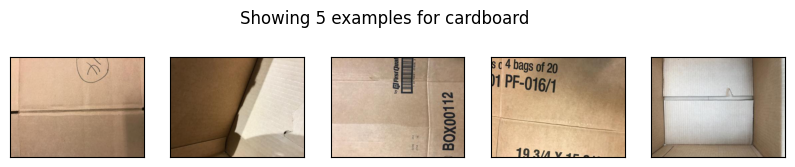

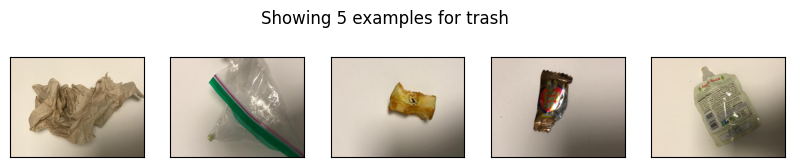

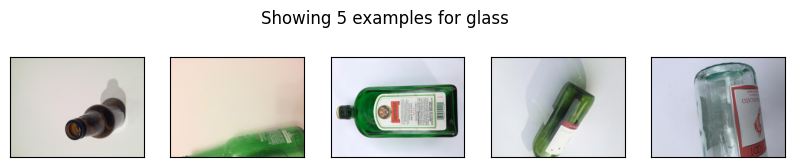

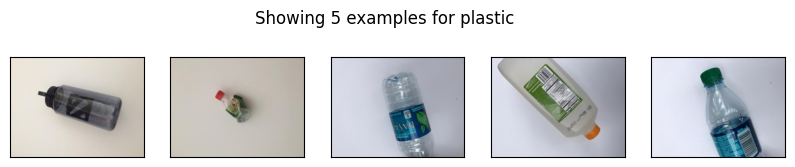

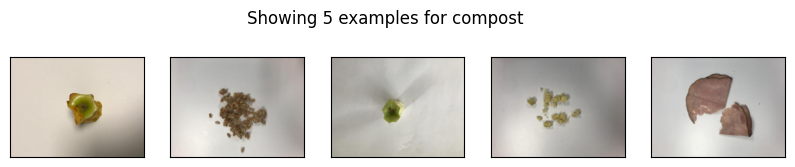

In [8]:
NUM_EXAMPLES = 5

for label in labels:
  label_dir = os.path.join(train_path, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

In [9]:
data = image_classifier.Dataset.from_folder(train_path)

train_data, validation_data = data.split(0.9)
test_data = image_classifier.Dataset.from_folder(test_path)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [10]:
spec = image_classifier.SupportedModels.EFFICIENTNET_LITE0

#EFFICIENTNET_LITE0
#EFFICIENTNET_LITE2
#EFFICIENTNET_LITE4
#MOBILENET_V2
# https://developers.google.com/mediapipe/api/solutions/python/mediapipe_model_maker/image_classifier/SupportedModels

hparams=image_classifier.HParams(epochs=20,
                                 shuffle=True,
                                 do_fine_tuning = False,
                                 batch_size=8,
                                 do_data_augmentation = True,
                                 export_dir="/content/drive/MyDrive/dataset-compost-net-versionA")

options = image_classifier.ImageClassifierOptions(supported_model=spec, hparams=hparams)

In [11]:
model = image_classifier.ImageClassifier.create(
    train_data = train_data,
    validation_data = validation_data,
    options=options,
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              3413024   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 7)                 8967      
                                                                 
Total params: 3,421,991
Trainable params: 8,967
Non-trainable params: 3,413,024
_________________________________________________________________
None
Resuming from /content/drive/MyDrive/dataset-compost-net-versionA/checkpoint/model-0020
Epoch 1/20
301/301 [==============================] - 334s 1s/step - loss: 0.8029 - accuracy: 0.8621 - val_loss: 0.6394 - val_accuracy: 0.9366
Epoch 2/20
301/301 [==============================] - 18s 60ms/step - 

In [12]:
loss, acc = model.evaluate(test_data)
print(f'Test loss:{loss}, Test accuracy:{acc}')

3/3 [==============================] - 19s 5s/step - loss: 0.8639 - accuracy: 0.8082
Test loss:0.8638810515403748, Test accuracy:0.8082191944122314


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              3413024   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 7)                 8967      
                                                                 
Total params: 3,421,991
Trainable params: 8,967
Non-trainable params: 3,413,024
_________________________________________________________________


In [14]:
model.export_model()

In [15]:
from mediapipe_model_maker import quantization

In [16]:
quantization_config = quantization.QuantizationConfig.for_int8(train_data)

In [17]:
model.export_model(model_name="model_int8.tflite", quantization_config=quantization_config)

In [18]:
ls -lh /content/drive/MyDrive/dataset-compost-net-versionA

total 86M
drwx------ 2 root root 4.0K Jul 11 02:41 checkpoint/
-rw------- 1 root root  30M May 30  2019 compostnet-dataset-resized.zip
-rw------- 1 root root  100 May 30  2019 constants.py
-rw------- 1 root root 1.7K Jul 11 02:44 metadata.json
-rw------- 1 root root 4.0M Jul 11 02:44 model_int8.tflite
-rw------- 1 root root  13M Jul 11 02:42 model.tflite
-rw------- 1 root root 1.7K May 30  2019 resize.py
drwx------ 4 root root 4.0K Jun 18 19:00 summaries/
drwx------ 9 root root 4.0K Jun 18 05:40 test/
drwx------ 2 root root 4.0K Jun 18 05:40 tf_files/
-rw------- 1 root root  40M May 30  2019 tf_files.zip
drwx------ 9 root root 4.0K Jun 18 05:40 training/
